In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url,names=['sepal width','sepal height','petal width','petal height','target'])

In [5]:
features = ['sepal width','sepal height','petal width','petal height']
x = df.loc[:,features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [6]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf,df[['target']]],axis=1)

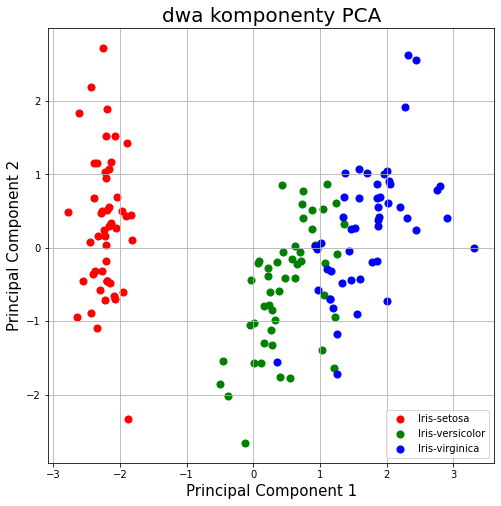

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title('dwa komponenty PCA',fontsize=20)
targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']
for target,color in zip(targets,colors):
    itk = finalDf['target'] == target
    ax.scatter(finalDf.loc[itk,'principal component 1'],
               finalDf.loc[itk,'principal component 2'],
               c = color,
               s = 50
               )
ax.legend(targets)
ax.grid()
plt.show()